In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Se cargan los datos

Más información en: https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/#ProblemStatement

In [2]:
df = pd.read_csv("/content/Train.csv")
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [3]:
df = df.drop("ID", axis = 1)

#Se hace un análisis exploratorio de los datos

In [4]:
df = df.drop(columns = ["Var_1", "Segmentation"])

In [87]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0
...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0
8064,Male,No,35,No,Executive,3.0,Low,4.0
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0


In [86]:
df.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [85]:
df.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 504.4+ KB


##Visualizaciones

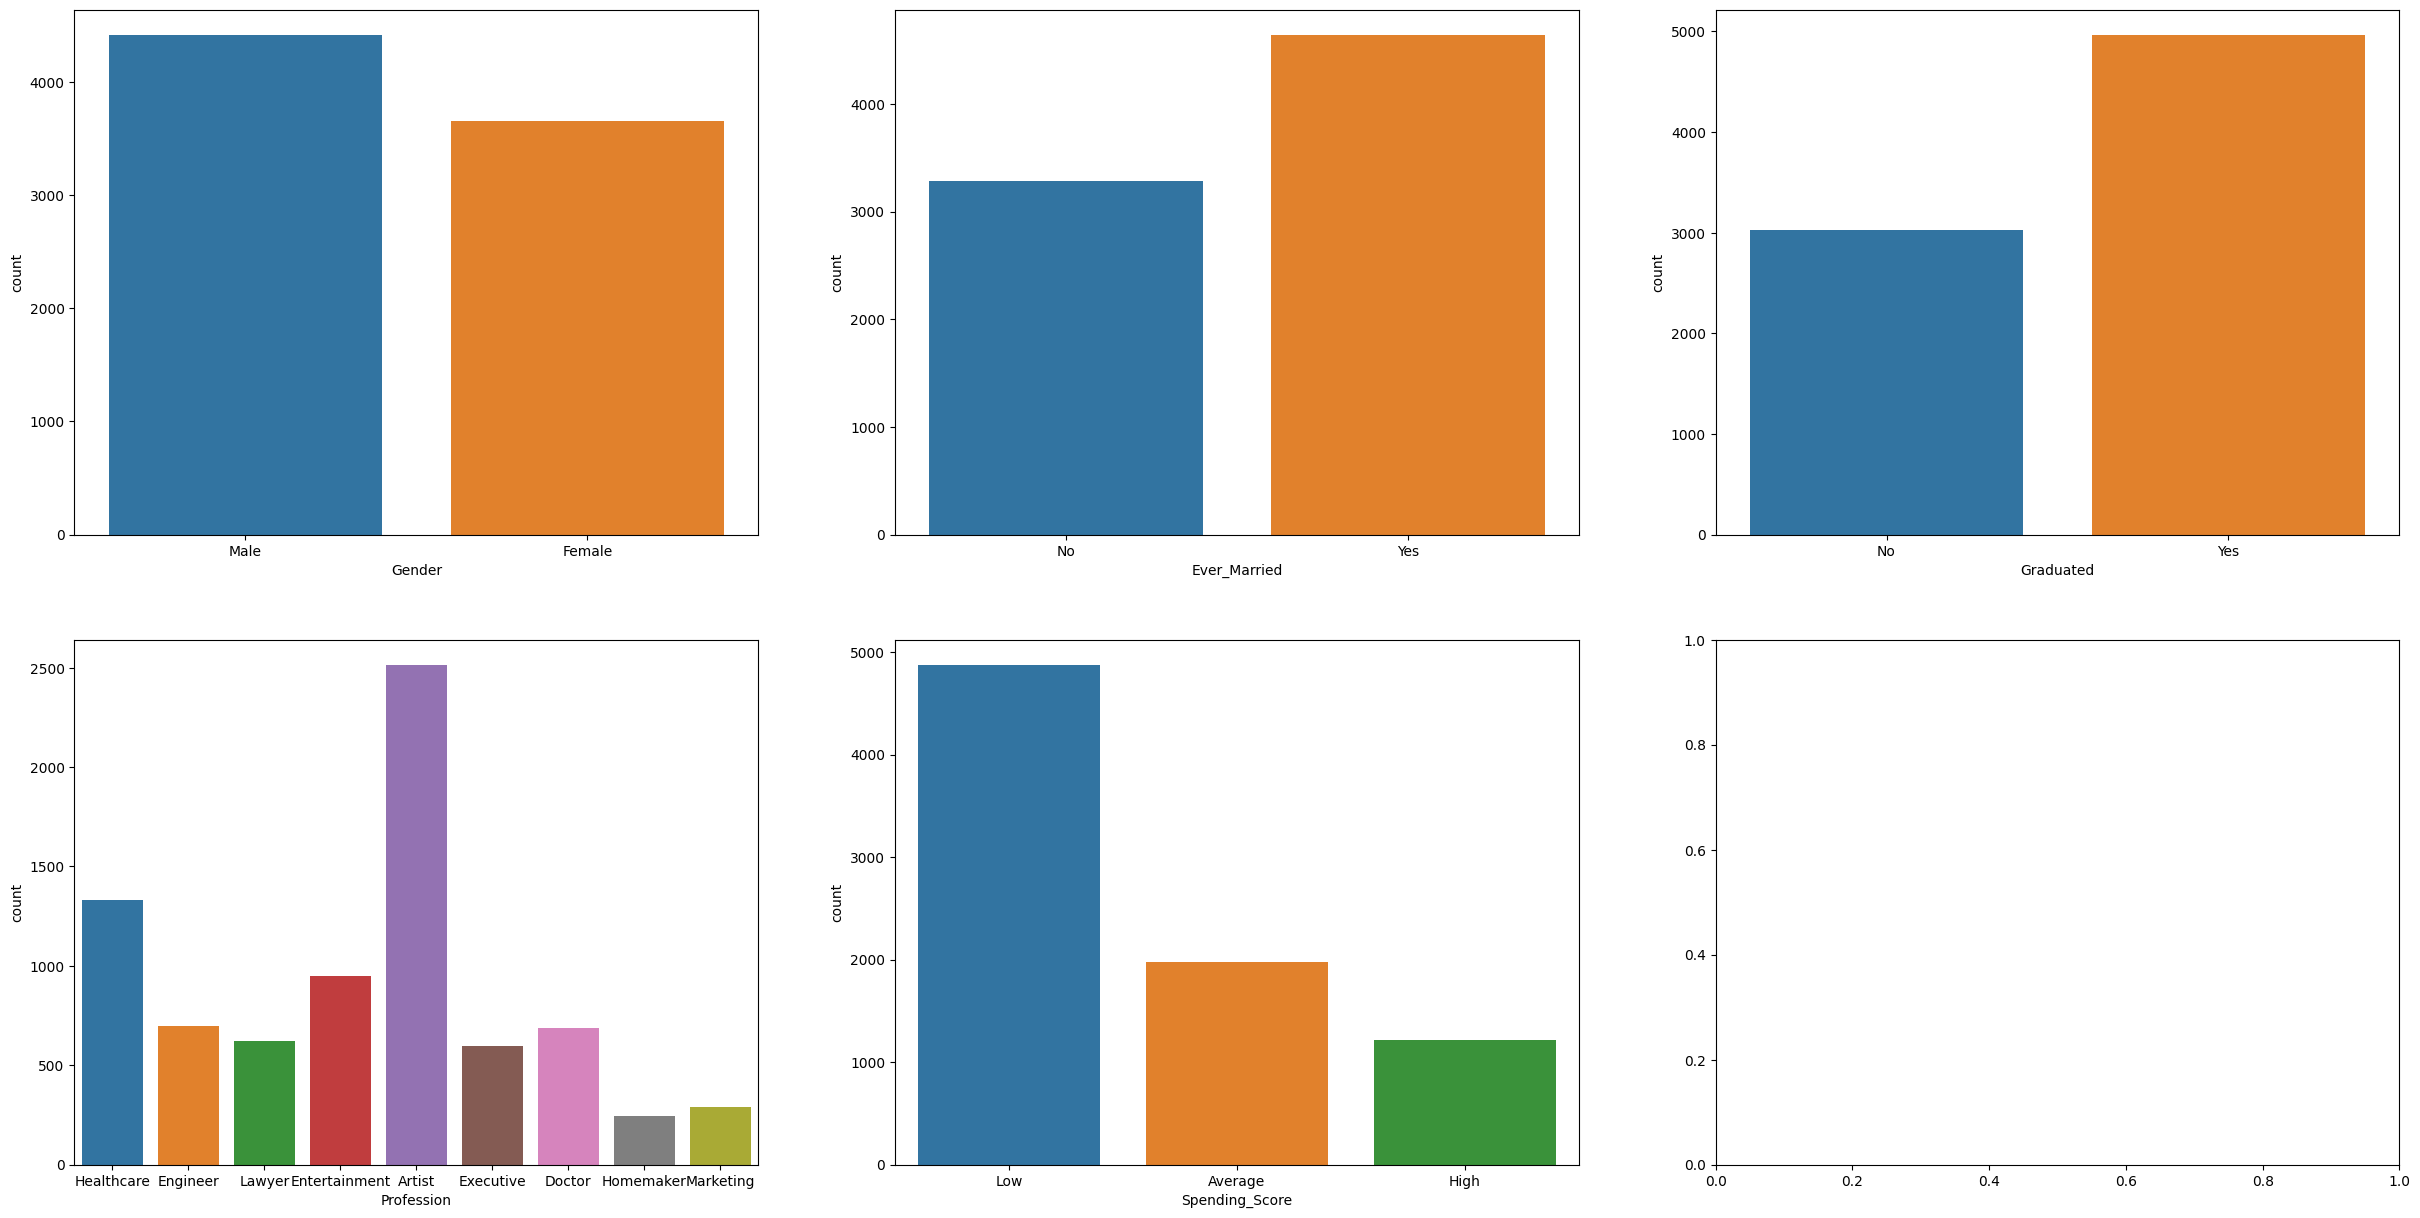

In [83]:
fig, axes = plt.subplots(ncols=3, nrows = 2, figsize=(30, 15))

kkk = 0
kk = 0


for i in ['Gender', 'Ever_Married', 'Graduated', 'Profession','Spending_Score']:
  plt.sca(axes[kk, kkk])
  sns.countplot(df, x = i)

  kkk +=1
  if kkk == 3:
    kk += 1
    kkk = 0

plt.show()

En la gráfica anterior se observa un desbalance entre las profesiones, el puntaje de gasto y la variable graduated.

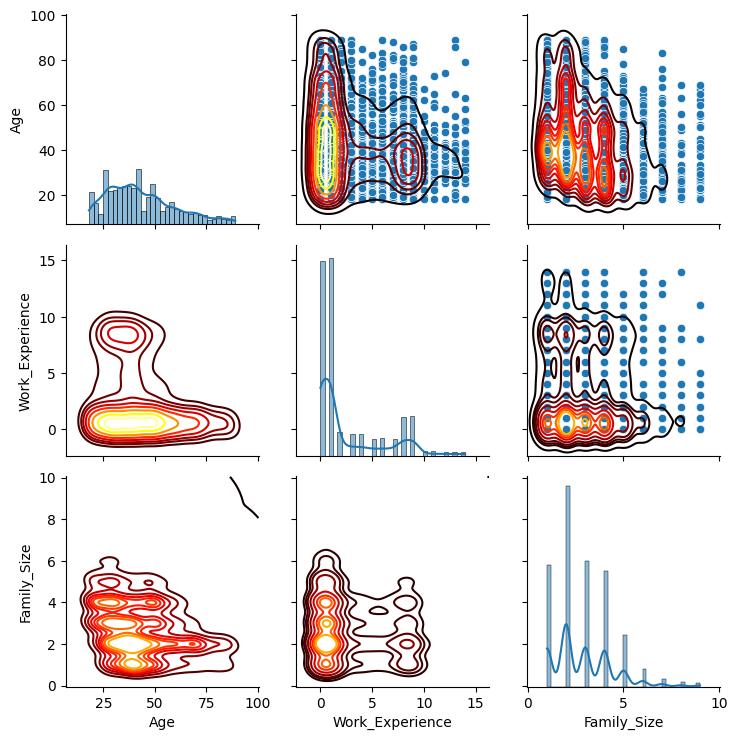

In [ ]:
g = sns.PairGrid(df)

g.map_diag(sns.histplot,kde = True)
g.map_lower(sns.kdeplot, fill = False, cmap = "hot", thresh = 0)
g.map_upper(sns.scatterplot)
g.map_upper(sns.kdeplot, cmap = "hot")

##Se buscan correlaciones entre las variables

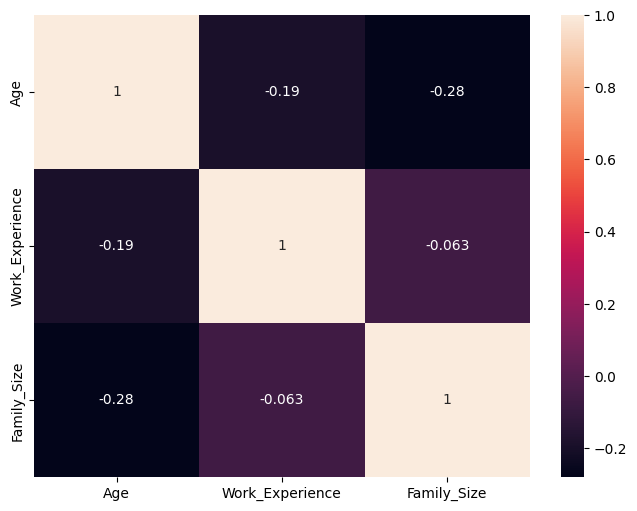

In [ ]:
corr_df =df.corr(method="pearson", numeric_only = True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

#Data cleaning

##Se cambian los valores nulos por la mediana de los valores

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

X_num = df.loc[:, ['Age', "Work_Experience", "Family_Size"]].copy()

imputer.fit(X_num)

imputer.statistics_

array([40.,  1.,  3.])

In [7]:
X_new= imputer.transform(X_num)

In [8]:
X_tr = pd.DataFrame(X_new, columns=X_num.columns,
                    index=X_num.index)

In [9]:
X_tr.isnull().sum()

Age                0
Work_Experience    0
Family_Size        0
dtype: int64

#Preprocesamiento de los datos

##Se realiza un escalado de las características

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
standard_scaler = StandardScaler()

X_SS = standard_scaler.fit_transform(X_tr)

X_encoded = pd.DataFrame(X_SS, columns=X_tr.columns,
                    index=X_tr.index)

In [12]:
X_encoded.describe()

,Age,Work_Experience,Family_Size
count,8.068000e+03,8.068000e+03,8.068000e+03
mean,6.340986e-17,-4.139255e-17,-9.599549e-17
std,1.000062e+00,1.000062e+00,1.000062e+00
min,-1.523992e+00,-7.574104e-01,-1.237990e+00
25%,-8.058871e-01,-7.574104e-01,-5.710940e-01
50%,-2.074667e-01,-4.511360e-01,9.580227e-02
75%,5.704798e-01,4.676873e-01,7.626985e-01
max,2.724793e+00,3.530431e+00,4.097180e+00


##Se convierten los atributos categóricos a vectores one-hot

In [13]:
X_categorical = df.loc[:, ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']]

In [14]:
X_OneHotEncoding = pd.get_dummies(X_categorical)

##Se combinan los atributos categóricos con los númericos

In [15]:
X_train = X_OneHotEncoding.assign(Age = X_encoded["Age"], Experienciadetrabajo =X_encoded['Work_Experience'], Tamanodefamilia = X_encoded['Family_Size'] )

In [ ]:
X_train

,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Age,Experienciadetrabajo,Tamanodefamilia
0,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,-1.284623,-0.451136,0.762698
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,-0.327151,-0.451136,0.095802
2,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,1.408268,-0.451136,-1.237990
3,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1.408268,-0.757410,-0.571094
4,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,-0.207467,-0.451136,2.096491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,-1.284623,-0.757410,2.763387
8064,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,-0.506677,0.161413,0.762698
8065,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,-0.626361,-0.451136,-1.237990
8066,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,-0.985413,-0.451136,0.762698


#Reducción de dimensionalidad

In [16]:
from sklearn.decomposition import PCA

##Se conserva el 95% de la varianza

In [17]:
pca = PCA(n_components=0.95)

In [18]:
X_train_new = pd.DataFrame(pca.fit_transform(X_train), index=X_train.index)

#Se crea el modelo

##KMeans

In [19]:
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k, n_init = 10)
y_pred = kmeans.fit_predict(X_train_new)

In [43]:
kmeans_por_grupo = [KMeans(n_clusters=k, n_init = 10, random_state=42).fit(X_train)
                for k in range(1, 10)]
inercias = [model.inertia_ for model in kmeans_por_grupo]

##Se gráfica la inercia como funcion del número de grupos

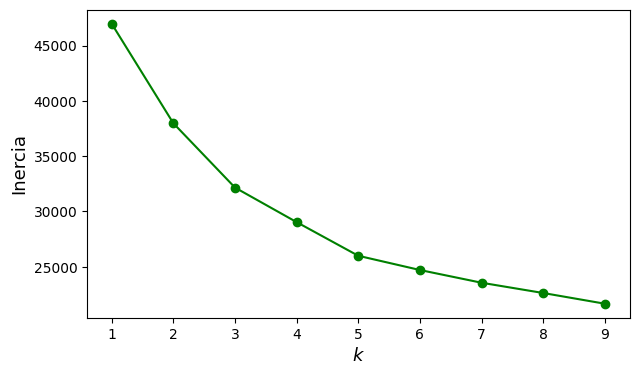

In [47]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, 10), inertias, "go-")
plt.ylabel("Inercia", fontsize=13)
plt.xlabel("$k$", fontsize=13)

plt.show()

Se observa en la gráfica un punto de inflexión en el número de grupo k=5.

In [39]:
from sklearn.metrics import silhouette_score

In [46]:
puntaje_silhouette = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_por_grupo[1:]]

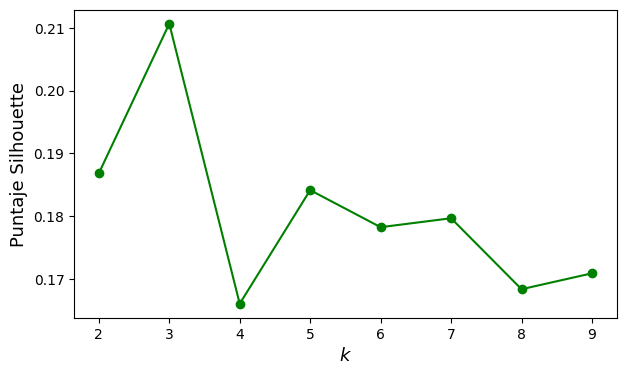

In [49]:
plt.figure(figsize=(7, 4))
plt.plot(range(2, 10), silhouettescores, "go-")
plt.xlabel("$k$", fontsize=13)
plt.ylabel("Puntaje Silhouette", fontsize=13)
plt.show()

Se observa el mayor puntaje para el número de grupo k = 3.

##Se entrena el modelo para un número de 4 grupos

In [91]:
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k, n_init = 100, random_state = 42)
y_pred = kmeans.fit_predict(X_train_new) +1

In [94]:
df1 = df.assign(pred = y_pred)

##Visualización de las variables categóricas por los 4 grupos

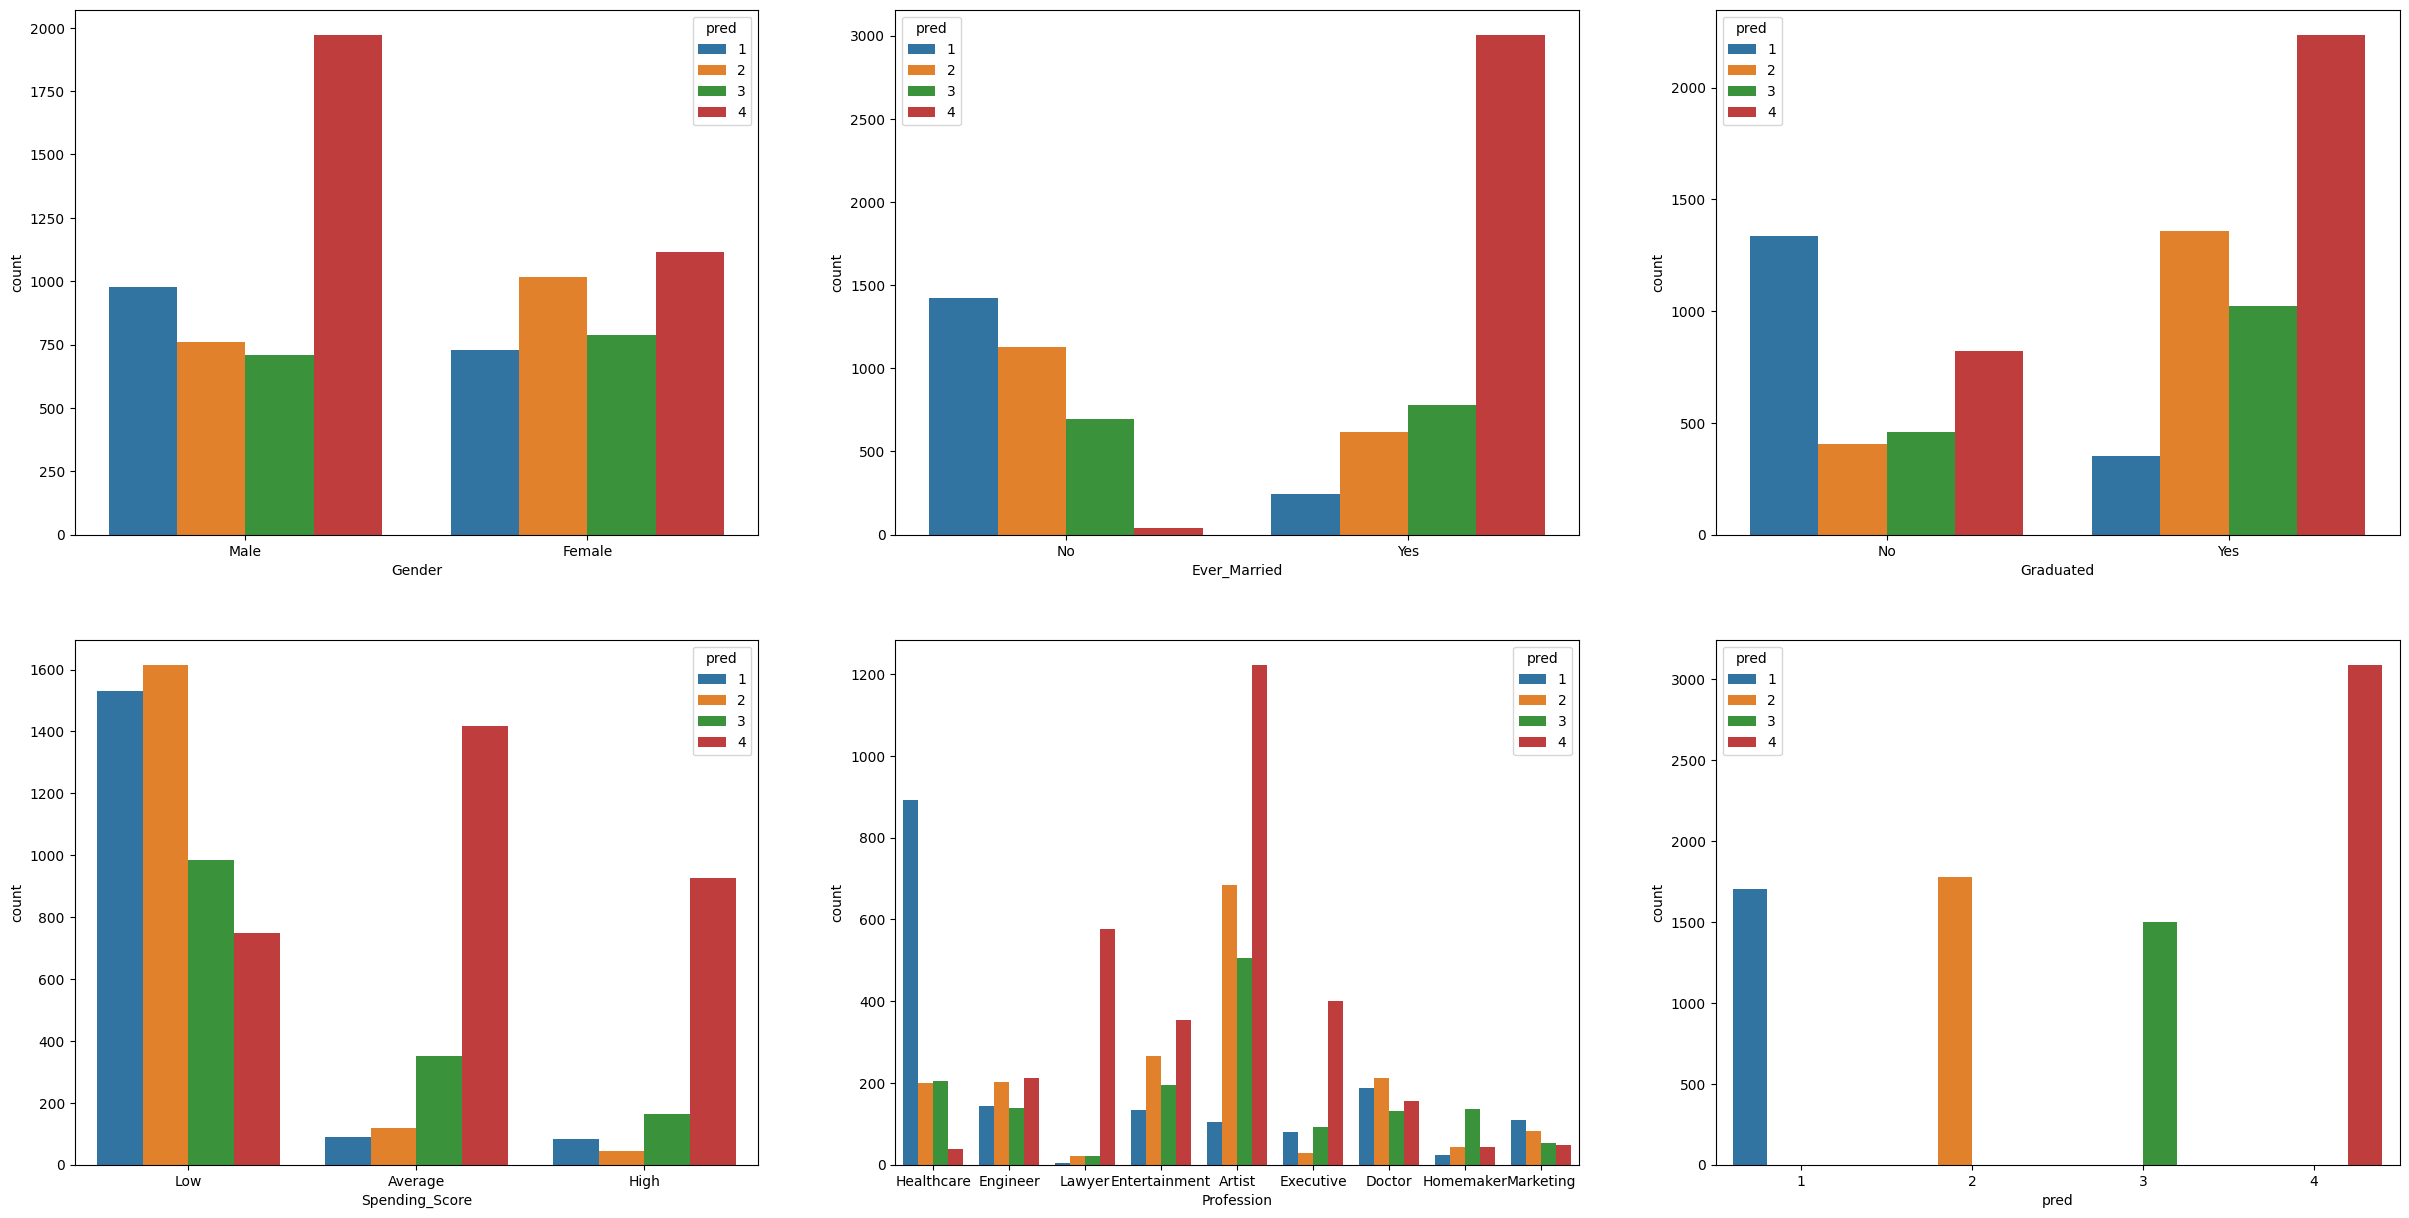

In [107]:
fig, axes = plt.subplots(ncols=3, nrows = 2, figsize=(30, 15))

kkk = 0
kk = 0

for i in ["Gender", "Ever_Married", "Graduated", "Spending_Score", "Profession", "pred"]:
  plt.sca(axes[kk, kkk])
  sns.countplot(df1, x = i, hue = "pred")

  kkk +=1
  if kkk == 3:
    kk += 1
    kkk = 0

plt.show()

Visualización de las variables númericas por los 4 grupos

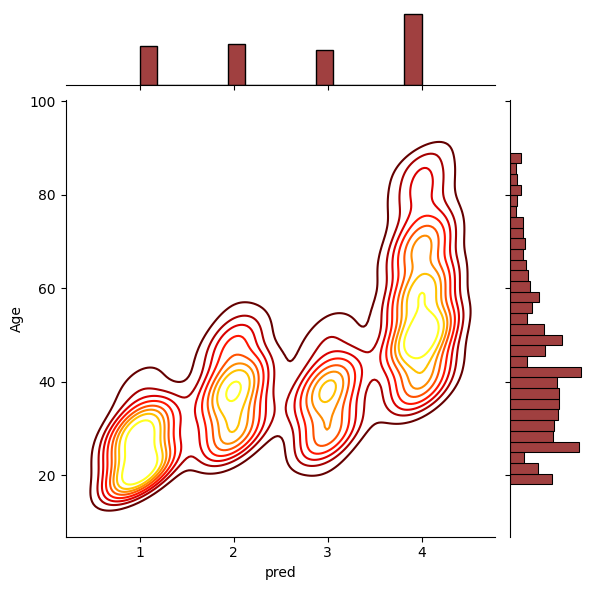

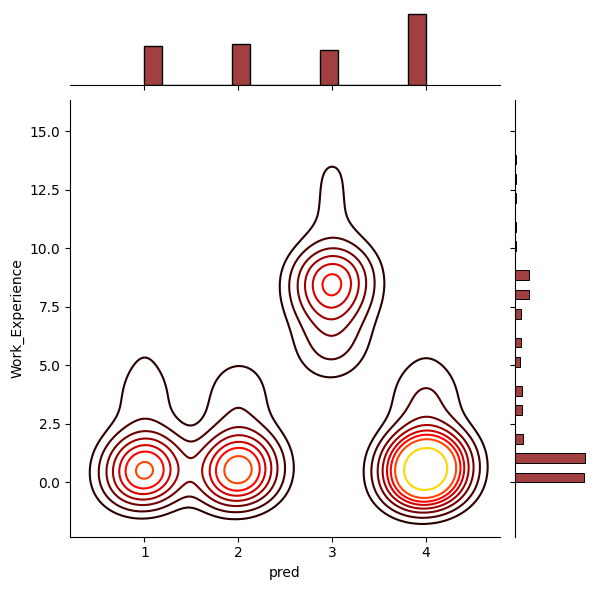

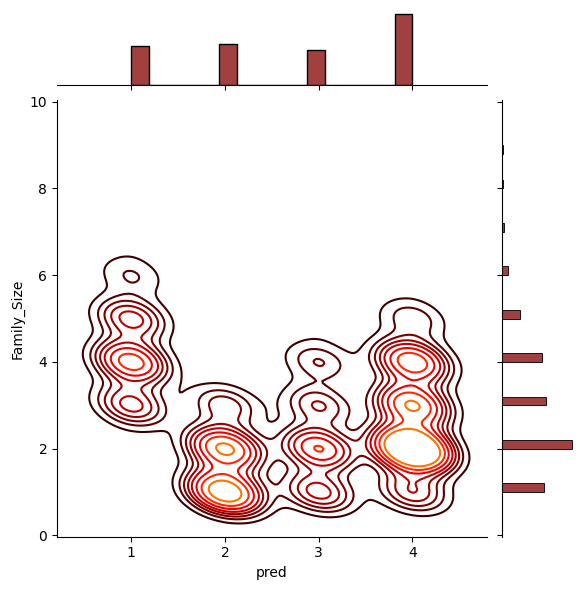

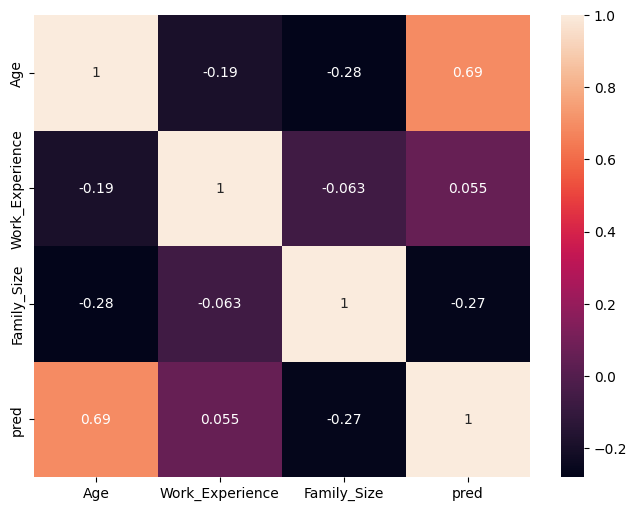

In [96]:
g = sns.JointGrid(data=df1, x="pred", y= "Age")
g.plot_joint(sns.kdeplot, fill = False, cmap = "hot", thresh = 0)
g.plot_marginals(sns.histplot, color = "maroon")

g = sns.JointGrid(data=df1, x="pred", y= "Work_Experience")
g.plot_joint(sns.kdeplot, fill = False, cmap = "hot", thresh = 0)
g.plot_marginals(sns.histplot, color = "maroon")

g = sns.JointGrid(data=df1, x="pred", y= "Family_Size")
g.plot_joint(sns.kdeplot, fill = False, cmap = "hot", thresh = 0)
g.plot_marginals(sns.histplot, color = "maroon")

corr_df =df1.corr(method="pearson", numeric_only = True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [101]:
df1[df1["pred"] == 1].describe()

,Age,Work_Experience,Family_Size,pred
count,1702.000000,1484.000000,1621.00000,1702.0
mean,27.167450,1.440027,4.54781,1.0
std,7.407167,2.055150,1.46092,0.0
min,18.000000,0.000000,2.00000,1.0
25%,21.000000,0.000000,4.00000,1.0
50%,26.000000,1.000000,4.00000,1.0
75%,31.000000,1.000000,5.00000,1.0
max,69.000000,11.000000,9.00000,1.0


In [102]:
df1[df1["pred"] == 2].describe()

,Age,Work_Experience,Family_Size,pred
count,1777.000000,1541.000000,1706.000000,1777.0
mean,38.410805,1.024659,1.695193,2.0
std,9.385156,1.258494,0.734368,0.0
min,18.000000,0.000000,1.000000,2.0
25%,31.000000,0.000000,1.000000,2.0
50%,38.000000,1.000000,2.000000,2.0
75%,45.000000,1.000000,2.000000,2.0
max,73.000000,5.000000,4.000000,2.0


In [109]:
df1[df1["pred"] == 3].describe()

,Age,Work_Experience,Family_Size,pred
count,1499.000000,1499.000000,1427.000000,1499.0
mean,37.791194,8.486324,2.451296,3.0
std,10.603475,1.951424,1.273686,0.0
min,18.000000,4.000000,1.000000,3.0
25%,30.000000,7.500000,2.000000,3.0
50%,37.000000,8.000000,2.000000,3.0
75%,42.500000,9.000000,3.000000,3.0
max,89.000000,14.000000,9.000000,3.0


In [104]:
df1[df1["pred"] == 4].describe()

,Age,Work_Experience,Family_Size,pred
count,3090.000000,2715.000000,2979.000000,3090.0
mean,58.105825,0.989319,2.778785,4.0
std,14.243664,1.330816,1.195079,0.0
min,28.000000,0.000000,1.000000,4.0
25%,47.000000,0.000000,2.000000,4.0
50%,56.000000,1.000000,2.000000,4.0
75%,69.000000,1.000000,4.000000,4.0
max,89.000000,9.000000,9.000000,4.0


#Análisis de las gráficas


---


El grupo 1 son las personas más jóvenes (21 a 31 años), no están casados ni graduados. Cuentan con el menor puntaje de gasto (bajo). Son personas con diversas profesiones, pero se destacan por dedicarse al cuidado de la salud. Tienen de 3 a 4 miembros de familia.

---


El grupo 2 son jóvenes adultos (31 a 45 años), la mayoría es graduada. Cuentan con puntaje de gasto bajo (similar al grupo 1). Tienen de 0 a 1 miembros de familia.

---


El grupo 3 son jóvenes adultos (30 a 42 años), cuentan con la mayor experiencia laboral (7 a 9 años de experiencia). La mayoría es graduada, con puntaje de gasto siguiente al grupo 4 (aunque mayoritariamente bajo). Tienen de 1 a 2 miembros de familia.




---



El grupo 4 tiene a las personas con mayor edad (47 a 69 años), son personas casadas y mayoritariamente graduadas. Cuentan con un puntaje de gasto promedio y alto. Tienen distintas profesiones, pero se destacan por ser abogados, ejecutivos y por dedicarse al entretenimiento. Tienen de 1 a 3 miembros de familia.


---




